In [1]:
#Importing the relevant librabries
import numpy as np 
import pandas as pd 
#importing matplotlib and seaborn libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#import plotly.express as px
import warnings
warnings. filterwarnings('ignore')

In [2]:
#This function is going to input all the files at once from the directory
import os
for dirname, _, filenames in os.walk('D:\\R-Projects\\novel-corona-virus-2019-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))        

D:\R-Projects\novel-corona-virus-2019-dataset\2019_nCoV_data.csv
D:\R-Projects\novel-corona-virus-2019-dataset\time_series_2019_ncov_confirmed.csv
D:\R-Projects\novel-corona-virus-2019-dataset\time_series_2019_ncov_deaths.csv
D:\R-Projects\novel-corona-virus-2019-dataset\time_series_2019_ncov_recovered.csv


In [3]:
data=pd.read_csv('D:\\R-Projects\\novel-corona-virus-2019-dataset\\2019_nCoV_data.csv')
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [4]:
#which columns are in our dataset?
data.columns

Index(['Sno', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [5]:
#data.drop('Sno', axis=1, inplace=True)

drop_these = ['Sno',
           'Last Update',]
data.drop(drop_these, inplace = True, axis = 1)
data.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,0.0,0.0,0.0


In [6]:
#Lets confirm if the Sno is dropped
data.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22/2020 12:00:00,Anhui,China,1.0,0.0,0.0
1,01/22/2020 12:00:00,Beijing,China,14.0,0.0,0.0
2,01/22/2020 12:00:00,Chongqing,China,6.0,0.0,0.0
3,01/22/2020 12:00:00,Fujian,China,1.0,0.0,0.0
4,01/22/2020 12:00:00,Gansu,China,0.0,0.0,0.0


In [7]:
#Let's see the missing values in this dataset
missing_data =data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Column Name', 'Missing Values Count']
missing_data['Filling Factor (%)']=(data.shape[0]-missing_data['Missing Values Count'])/data.shape[0]*100
missing_data.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,Province/State,332,73.899371
1,Date,0,100.000000
2,Country,0,100.000000
3,Confirmed,0,100.000000
4,Deaths,0,100.000000
5,Recovered,0,100.000000


In [8]:
# Now let's Convert Last Update column to datetime64 format #but we have alread dropped it
data['Date'] = data['Date'].apply(pd.to_datetime)
data.tail(5)

,Date,Province/State,Country,Confirmed,Deaths,Recovered
1267,2020-02-11 20:44:00,"Madison, WI",US,1.0,0.0,0.0
1268,2020-02-11 20:44:00,"Orange, CA",US,1.0,0.0,0.0
1269,2020-02-11 20:44:00,"San Diego County, CA",US,1.0,0.0,0.0
1270,2020-02-11 20:44:00,"Seattle, WA",US,1.0,0.0,1.0
1271,2020-02-11 20:44:00,"Tempe, AZ",US,1.0,0.0,0.0


In [9]:
#NOw let's 
data['Country'] = data['Country'].replace('Mainland China', 'China')
data.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,0.0,0.0,0.0


In [10]:
#Can we know the total number of contries affected by coronavirus

countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others']

Total countries affected by virus:  32


In [11]:
#Affected provinces in all dataset
provinces = data['Province/State'].unique().tolist()
print(provinces)

print("\nTotal provinces affected by virus: ",len(provinces))

['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan', 'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang', nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario', 'New South Wales', 'Victoria', 'Bavaria', 'British Columbia', 'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA', 'Tempe, AZ', 'Toronto, ON', 'San Benito, CA', 'London, ON', 'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship', 'San Diego County, CA']

Total provinces affected by virus:  61


In [12]:
#How many confirmed cases in each country? let's see now
Number_of_countries = len(data['Country'].value_counts())
cases = pd.DataFrame(data.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Confirmed
1,Australia,194.0
2,Belgium,8.0
3,Brazil,0.0
4,Cambodia,16.0
5,Canada,73.0
6,China,372405.0
7,Finland,14.0
8,France,117.0
9,Germany,156.0
10,Hong Kong,349.0


In [13]:
#How about the Deaths in each country
Number_of_countries = len(data['Country'].value_counts())
cases = pd.DataFrame(data.groupby('Country')['Deaths'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Deaths']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Deaths
1,Australia,0.0
2,Belgium,0.0
3,Brazil,0.0
4,Cambodia,0.0
5,Canada,0.0
6,China,8244.0
7,Finland,0.0
8,France,0.0
9,Germany,0.0
10,Hong Kong,8.0


In [14]:
#Are there some recovered cases as at now? Lets see 
Number_of_countries = len(data['Country'].value_counts())
cases = pd.DataFrame(data.groupby('Country')['Recovered'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Recovered']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Recovered
1,Australia,26.0
2,Belgium,0.0
3,Brazil,0.0
4,Cambodia,0.0
5,Canada,0.0
6,China,22073.0
7,Finland,1.0
8,France,0.0
9,Germany,0.0
10,Hong Kong,0.0


In [15]:
#Lets look cumulatively the cases confirmed, death and recovered
print('Globally Confirmed Cases: ',data['Confirmed'].sum())
print('Global Deaths: ',data['Deaths'].sum())
print('Globally Recovered Cases: ',data['Recovered'].sum())

Globally Confirmed Cases:  376297.0
Global Deaths:  8263.0
Globally Recovered Cases:  22307.0


In [16]:
#We can dig deeper into provinces within the countries 

#data.groupby(['Country','Province/State']).sum()

c_provinces = data.groupby(['Country','Province/State']).sum()
c_provinces.head(10)

Confirmed  Deaths  Recovered
Country   Province/State                                
Australia New South Wales        64.0     0.0       26.0
          Queensland             48.0     0.0        0.0
          South Australia        22.0     0.0        0.0
          Victoria               52.0     0.0        0.0
Canada    British Columbia       31.0     0.0        0.0
          London, ON              9.0     0.0        0.0
          Ontario                15.0     0.0        0.0
          Toronto, ON            18.0     0.0        0.0
China     Anhui                7959.0    11.0      486.0
          Beijing              3713.0    21.0      339.0

In [17]:
# Let's more a step deeper, which Provinces have deaths taken place?
data.groupby('Province/State')['Deaths'].sum().sort_values(ascending=False)[:5]

Province/State
Hubei           7954.0
Heilongjiang      53.0
Henan             52.0
Hebei             24.0
Hainan            24.0
Name: Deaths, dtype: float64

In [18]:
# Lets also look at the Recovered stats
data.groupby('Province/State')['Recovered'].sum().sort_values(ascending=False)[:10]

Province/State
Hubei        12393.0
Zhejiang      1406.0
Hunan         1149.0
Guangdong     1012.0
Henan          999.0
Jiangxi        637.0
Anhui          486.0
Sichuan        453.0
Jiangsu        451.0
Shandong       374.0
Name: Recovered, dtype: float64

In [19]:
#Up to now China seems to be considered with a keen eye..the situation seems threatening 
#Lets explore China singly and see the spread of the virus
China = data[data['Country']=='China']
China

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,0.0,0.0,0.0
...,...,...,...,...,...,...
1226,2020-02-11 20:44:00,Xinjiang,China,59.0,0.0,3.0
1227,2020-02-11 20:44:00,Inner Mongolia,China,58.0,0.0,5.0
1228,2020-02-11 20:44:00,Ningxia,China,53.0,0.0,22.0
1234,2020-02-11 20:44:00,Qinghai,China,18.0,0.0,5.0


In [20]:
#lets examine Hubei province singly 
virus_Hubei=data[data["Province/State"]=="Hubei"]
virus_Hubei

,Date,Province/State,Country,Confirmed,Deaths,Recovered
13,2020-01-22 12:00:00,Hubei,China,444.0,0.0,0.0
51,2020-01-23 12:00:00,Hubei,China,444.0,17.0,28.0
83,2020-01-24 12:00:00,Hubei,China,549.0,24.0,31.0
124,2020-01-25 22:00:00,Hubei,China,1052.0,52.0,42.0
168,2020-01-26 23:00:00,Hubei,China,1423.0,76.0,44.0
215,2020-01-27 20:30:00,Hubei,China,2714.0,100.0,47.0
267,2020-01-28 23:00:00,Hubei,China,3554.0,125.0,80.0
319,2020-01-29 21:00:00,Hubei,China,4586.0,162.0,90.0
375,2020-01-30 21:30:00,Hubei,China,5806.0,204.0,116.0
434,2020-01-31 19:00:00,Hubei,China,7153.0,249.0,169.0


In [21]:
#Let's see the plot the above dataset in line and bar plot
#confirmed,deaths,recovered in hubei day to day
fig=go.Figure()
fig.add_traces(go.Scatter(x=virus_Hubei.Date,y=virus_Hubei.Confirmed,mode="lines+markers",name="Confirmed"))
fig.add_traces(go.Scatter(x=virus_Hubei.Date,y=virus_Hubei.Deaths,mode="lines+markers",name="Deaths"))
fig.add_traces(go.Scatter(x=virus_Hubei.Date,y=virus_Hubei.Recovered,mode="lines+markers",name="Recovered"))
fig.update_layout(title='Confirmed vs Recovered vs Deaths trend of Corona virus in Hubei',
                   xaxis_title='Dates',
                   yaxis_title='Cases')
fig.show()

NameError: name 'go' is not defined

In [22]:
#confirmed cases in hubei day to day bar representation
fig=go.Figure(data=[
    go.Bar(name="Confirmed",x=virus_Hubei.Date,y=virus_Hubei.Confirmed),
    go.Bar(name="Deaths",x=virus_Hubei.Date,y=virus_Hubei.Deaths),
    go.Bar(name="Recovered",x=virus_Hubei.Date,y=virus_Hubei.Recovered)
])
fig.update_layout(title='Confirmed vs Recovered vs Deaths trend of Corona virus in Hubei',
                   xaxis_title='Dates',
                   yaxis_title='Cases')
fig.show()

NameError: name 'go' is not defined

In [23]:
plt.figure(figsize=(12,7))
chart = sns.countplot(data=2019_nCoV_data, x='Country', palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light');

SyntaxError: invalid token (<ipython-input-23-ea976d73313d>, line 2)

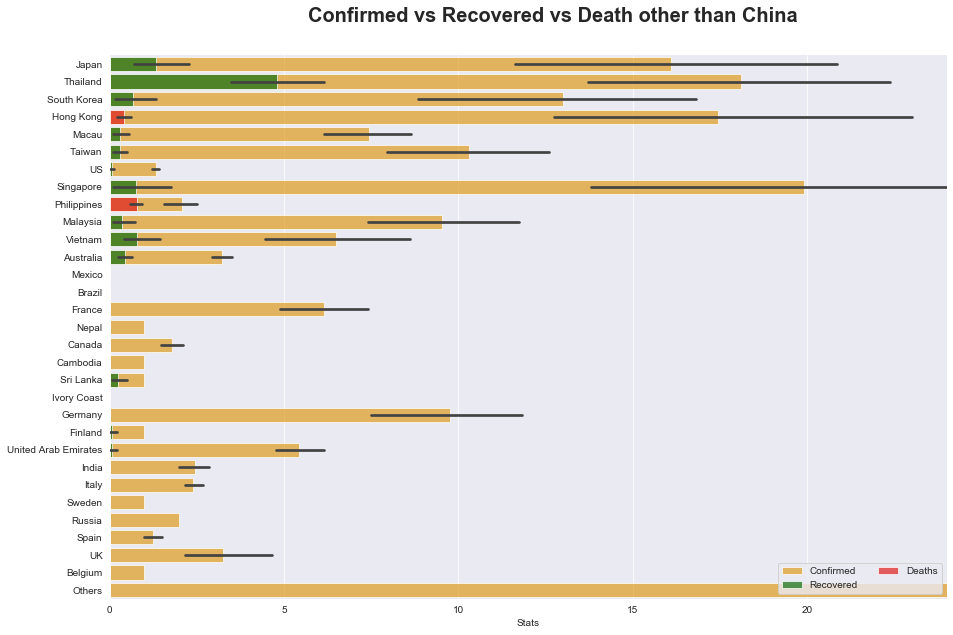

In [24]:
#Let's plot the statistics without China included 
chinaX=data[(data['Country'] != 'China') & (data['Country'] != 'China')]
f, ax = plt.subplots(figsize=(15, 10))


sns.barplot(x="Confirmed", y="Country", data=chinaX[1:],
            label="Confirmed", color="orange",alpha=0.7)


sns.barplot(x="Recovered", y="Country", data=chinaX[1:],
            label="Recovered", color="g",alpha=0.7)


sns.barplot(x="Deaths", y="Country", data=chinaX[1:],
            label="Deaths", color="r",alpha=0.7)

# Add a legend and informative axis label
ax.set_title('Confirmed vs Recovered vs Death other than China', fontsize=20, fontweight='bold', position=(0.53, 1.05))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [2]:
conda install plotly


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\nichs\Anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         151 KB
    conda-4.8.2                |           py37_0         2.8 MB
    plotly-4.4.1               |             py_0         1.7 MB
    retrying-1.3.3             |           py37_2          16 KB
    ------------------------------------------------------------
                                           Total:         4.7 MB

The following NEW packages will be INSTALLED:

  plotly             pkgs/main/noarch::plotly-4.4.1-py_0
  retrying           pkgs/main/win-64::retrying-1.3.3-py37_2

The following packages will be UPDATED:

  conda                       anaconda::conda-4.7.12-py37_0 --> pkgs/main::conda-4.8.2-py37_0

The followin

ERROR: The system was unable to find the specified registry key or value.
The system cannot find the batch label specified - End


In [ ]:
#confirmed,deaths,recovered in hubei day to day
fig=go.Figure()
fig.add_traces(go.Scatter(x=virus_Hubei.Date,y=virus_Hubei.Confirmed,mode="lines+markers",name="Confirmed"))
fig.add_traces(go.Scatter(x=virus_Hubei.Date,y=virus_Hubei.Deaths,mode="lines+markers",name="Deaths"))
fig.add_traces(go.Scatter(x=virus_Hubei.Date,y=virus_Hubei.Recovered,mode="lines+markers",name="Recovered"))
fig.update_layout(title='Confirmed vs Recovered vs Deaths trend of Corona virus in Hubei',
                   xaxis_title='Dates',
                   yaxis_title='Cases')
fig.show()

In [ ]:
#confirmed cases in hubei day to day bar representation
fig=go.Figure(data=[
    go.Bar(name="Confirmed",x=virus_Hubei.Date,y=virus_Hubei.Confirmed),
    go.Bar(name="Deaths",x=virus_Hubei.Date,y=virus_Hubei.Deaths),
    go.Bar(name="Recovered",x=virus_Hubei.Date,y=virus_Hubei.Recovered)
])
fig.update_layout(title='Confirmed vs Recovered vs Deaths trend of Corona virus in Hubei',
                   xaxis_title='Dates',
                   yaxis_title='Cases')
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=grouped_cnf_df['Confirmed'], y=grouped_cnf_df['Country'], name='Confirmed', orientation = 'h'))
fig.add_trace(go.Bar(x=grouped_cnf_df['Deaths'], y=grouped_cnf_df['Country'], name='Deaths', orientation = 'h'))
fig.add_trace(go.Bar(x=grouped_cnf_df['Recovered'], y=grouped_cnf_df['Country'], name='Recovered', orientation = 'h'))

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'}, height = 1000)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(x=china_df['Confirmed'], y=china_df['Province/State'], name='Confirmed', orientation = 'h'))
fig.add_trace(go.Bar(x=china_df['Deaths'], y=china_df['Province/State'], name='Deaths', orientation = 'h'))
fig.add_trace(go.Bar(x=china_df['Recovered'], y=china_df['Province/State'], name='Recovered', orientation = 'h'))

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'}, height = 1000)
fig.show()